In [1]:
import random

import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster                   # Algoritmos de clustering.
from sklearn import datasets                  # Crear datasets.
from sklearn import manifold                  # Algoritmos de reduccion de dimensionalidad.
from sklearn import decomposition             # Módulo de reducción de dimensionalidad.
from sklearn.utils import check_random_state  # Gestión de números aleatorios.

# Clustering jerárquico y dendrograma.
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors

# UMAP para reducción de dimensionalidad.
import umap

# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
import sys 
import os
sys.path.append(os.path.abspath('/home/fran/Escritorio/i3uex/education_drop_clustering/Code/analysis_and_modeling'))
import dunn_index
from sklearn import metrics

%matplotlib inline

In [2]:

from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [3]:
analys_personal_data = pd.read_csv('../../../Data/For_analysis_and_modeling/2nd_quadrimester/analys_personal_data.csv',sep='|')

In [4]:
analys_personal_data.head()

expediente  cod_plan                                           des_plan  \
0           1      1623  GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
1           2      1623  GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
2           3      1623  GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
3           4      1623  GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
4           5      1623  GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   

  anio_apertura_expediente  abandona convocatoria_acceso  \
0                  2009-10         0                 JUN   
1                  2009-10         0                 JUN   
2                  2009-10         1                 JUN   
3                  2009-10         0                 JUN   
4                  2009-10         1                 JUN   

              des_acceso  nota_admision_def sexo  edad_acceso  distance  \
0           Selectividad              7.160    H           25    0.0000   
1           Selectividad              6.836    D           25  300.8896   
2  Formación Profesional              6.836    H           31  667.4084   
3  Formación Profesional              6.836    D           28   92.0223   
4           Selectividad              6.730    D           25   92.0223   

  becario  cum_pass_ratio  cum_absent_ratio  std_deviation  cum_median  \
0       N        0.166667          0.277778       1.531484       3.250   
1       S        0.235294          0.176471       1.990064       4.175   
2       S        0.312500          0.562500       1.566486       5.000   
3       N        0.166667          0.444444       1.345324       3.825   
4       N        0.263158          0.315789       1.850120       3.670   

   cum_pass_median  cum_fail_median  
0              5.0             2.50  
1              5.7             3.84  
2              5.0             2.50  
3              5.2             2.53  
4              5.4             2.50

In [5]:
interval_cols = []

In [6]:
analys_personal_data_model = analys_personal_data.copy()

In [7]:
analys_personal_data_model.drop(['expediente','cod_plan','abandona','distance'],axis=1,inplace=True)

In [8]:
analys_personal_data_model

des_plan  \
0     GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
1     GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
2     GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
3     GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
4     GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...   
...                                                 ...   
2266  GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA ...   
2267  GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA ...   
2268  GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA ...   
2269  GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA ...   
2270  GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA ...   

     anio_apertura_expediente convocatoria_acceso             des_acceso  \
0                     2009-10                 JUN           Selectividad   
1                     2009-10                 JUN           Selectividad   
2                     2009-10                 JUN  Formación Profesional   
3                     2009-10                 JUN  Formación Profesional   
4                     2009-10                 JUN           Selectividad   
...                       ...                 ...                    ...   
2266                  2016-17                 JUN           Selectividad   
2267                  2016-17                 JUN           Selectividad   
2268                  2016-17                 JUN           Selectividad   
2269                  2016-17                 JUN           Selectividad   
2270                  2016-17                 JUN           Selectividad   

      nota_admision_def sexo  edad_acceso becario  cum_pass_ratio  \
0                 7.160    H           25       N        0.166667   
1                 6.836    D           25       S        0.235294   
2                 6.836    H           31       S        0.312500   
3                 6.836    D           28       N        0.166667   
4                 6.730    D           25       N        0.263158   
...                 ...  ...          ...     ...             ...   
2266              6.882    H           19       N        0.066667   
2267              6.881    H           18       S        0.294118   
2268              6.754    H           18       S        0.105263   
2269              7.274    H           18       N        0.000000   
2270              6.225    H           18       S        0.105263   

      cum_absent_ratio  std_deviation  cum_median  cum_pass_median  \
0             0.277778       1.531484       3.250             5.00   
1             0.176471       1.990064       4.175             5.70   
2             0.562500       1.566486       5.000             5.00   
3             0.444444       1.345324       3.825             5.20   
4             0.315789       1.850120       3.670             5.40   
...                ...            ...         ...              ...   
2266          0.533333       1.198809       2.200             5.50   
2267          0.352941       2.065778       4.300             5.50   
2268          0.000000       1.473797       2.000             5.05   
2269          0.550000       0.696020       2.500             0.00   
2270          0.684211       1.929306       3.500             5.25   

      cum_fail_median  
0                2.50  
1                3.84  
2                2.50  
3                2.53  
4                2.50  
...               ...  
2266             2.10  
2267             3.00  
2268             1.80  
2269             2.50  
2270             2.25  

[2271 rows x 14 columns]

In [9]:
note_bcket_array = np.array([5, 6.5, 8, 9.5, 10, 11.5, 13, 14])
analys_personal_data_model['nota_admision_def'] = pd.cut(
    analys_personal_data_model['nota_admision_def'], note_bcket_array, include_lowest=True)
interval_cols.append('nota_admision_def')

year_bcket_array = np.array([18, 20, 25, 30, 35, 40, 45, 50, 55, 60])
analys_personal_data_model['edad_acceso'] = pd.cut(
    analys_personal_data_model['edad_acceso'], year_bcket_array, include_lowest=True)
interval_cols.append('edad_acceso')


# distance_bcket_array = np.array([0, 0.1, 45, 90, 135, 250, 500, 1892])
# analys_personal_data_model['distance'] = pd.cut(
#     analys_personal_data_model['distance'], distance_bcket_array, include_lowest=True)
# interval_cols.append('distance')

note_bcket_array = np.array([0, 1.5, 3, 4.5, 6, 7.5, 9, 10])
analys_personal_data_model['cum_median'] = pd.cut(
    analys_personal_data_model['cum_median'], note_bcket_array, include_lowest=True)
interval_cols.append('cum_median')

analys_personal_data_model['cum_pass_median'] = pd.cut(
    analys_personal_data_model['cum_pass_median'], note_bcket_array, include_lowest=True)
interval_cols.append('cum_pass_median')

analys_personal_data_model['cum_fail_median'] = pd.cut(
    analys_personal_data_model['cum_fail_median'], note_bcket_array, include_lowest=True)
interval_cols.append('cum_fail_median')

ratio_bcket_array = np.array([0, 0.25, 0.5, 0.75, 1])
analys_personal_data_model['cum_pass_ratio'] = pd.cut(
    analys_personal_data_model['cum_pass_ratio'], ratio_bcket_array, include_lowest=True)
interval_cols.append('cum_pass_ratio')

analys_personal_data_model['cum_absent_ratio'] = pd.cut(
    analys_personal_data_model['cum_absent_ratio'], ratio_bcket_array, include_lowest=True)
interval_cols.append('cum_absent_ratio')

std_bcket_array = np.array([0, 0.05,1.15,1.25,2.15,3.25])
analys_personal_data_model['std_deviation'] = pd.cut(
    analys_personal_data_model['std_deviation'], std_bcket_array, include_lowest=True)
interval_cols.append('std_deviation')


In [10]:
def le_dataset(dset, le_cols, cat_cols):
    from sklearn import preprocessing
    for col in cat_cols:
        le = preprocessing.LabelEncoder()
        le.fit(dset[col].cat.categories)
        le_cols.append(le)
        dset[col] = le.transform(dset[col])

In [11]:
def inverse_le_dataset(dset, le_cols, cat_cols):
    from sklearn import preprocessing
    i = 0
    for col in cat_cols:
        le = le_cols[i]
        from sklearn import preprocessing
        dset[col] = le.inverse_transform(dset[col])
        i +=1

In [12]:
def get_dunn_index(data, labels):
    from sklearn.metrics.pairwise import euclidean_distances
    distances = euclidean_distances(data)
    return dunn_index.dunn(labels,distances)
    

In [13]:
for col in analys_personal_data_model.columns:
    if 'object' in str(analys_personal_data_model.dtypes[col]):
        analys_personal_data_model[col] = analys_personal_data_model[col].astype('category')
        
le_cols = []
cat_cols = analys_personal_data_model.columns
analys_personal_data_labels = analys_personal_data_model.copy()
le_dataset(analys_personal_data_labels,le_cols,cat_cols)
analys_personal_data_labels.head()

des_plan  anio_apertura_expediente  convocatoria_acceso  des_acceso  \
0         1                         1                    5           3   
1         1                         1                    5           3   
2         1                         1                    5           1   
3         1                         1                    5           1   
4         1                         1                    5           3   

   nota_admision_def  sexo  edad_acceso  becario  cum_pass_ratio  \
0                  1     1            1        0               0   
1                  1     0            1        1               0   
2                  1     1            3        1               1   
3                  1     0            2        0               0   
4                  1     0            1        0               1   

   cum_absent_ratio  std_deviation  cum_median  cum_pass_median  \
0                 1              3           2                3   
1                 0              3           2                3   
2                 2              3           3                3   
3                 1              3           2                3   
4                 1              3           2                3   

   cum_fail_median  
0                1  
1                2  
2                1  
3                1  
4                1

In [14]:
analys_personal_data_labels.shape

(2271, 14)

In [15]:
import os
import numpy as np 

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model


In [16]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(analys_personal_data_labels)
analys_personal_data_labels[analys_personal_data_labels.columns] = norm.transform(analys_personal_data_labels)

In [17]:
analys_personal_data_labels.head()

des_plan  anio_apertura_expediente  convocatoria_acceso  des_acceso  \
0  0.166667                     0.125             0.833333         0.6   
1  0.166667                     0.125             0.833333         0.6   
2  0.166667                     0.125             0.833333         0.2   
3  0.166667                     0.125             0.833333         0.2   
4  0.166667                     0.125             0.833333         0.6   

   nota_admision_def  sexo  edad_acceso  becario  cum_pass_ratio  \
0           0.166667   1.0        0.125      0.0        0.000000   
1           0.166667   0.0        0.125      1.0        0.000000   
2           0.166667   1.0        0.375      1.0        0.333333   
3           0.166667   0.0        0.250      0.0        0.000000   
4           0.166667   0.0        0.125      0.0        0.333333   

   cum_absent_ratio  std_deviation  cum_median  cum_pass_median  \
0          0.333333           0.75    0.333333              0.5   
1          0.000000           0.75    0.333333              0.5   
2          0.666667           0.75    0.500000              0.5   
3          0.333333           0.75    0.333333              0.5   
4          0.333333           0.75    0.333333              0.5   

   cum_fail_median  
0         0.333333  
1         0.666667  
2         0.333333  
3         0.333333  
4         0.333333

In [18]:
def plot_orig_vs_recon(autoencoder, x_train,title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
#         fig.axes[i].set_xticklabels(metric_names)
#         plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

In [19]:
batch_size = 128

In [20]:
ncol = analys_personal_data_labels.shape[1]
encoding_dim = 2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(analys_personal_data_labels, 
                                                    analys_personal_data['abandona'],
                                                   test_size=0.25,
                                                   random_state=34)

In [22]:
activation = 'sigmoid'

## Sigmoid con 14,12,10,8,6,4,2

In [23]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(12, activation = activation)(input_dim)
encoded2 = Dense(10, activation = activation)(encoded1)
encoded3 = Dense(8, activation = activation)(encoded2)
encoded4 = Dense(6, activation = activation)(encoded3)
encoded5 = Dense(4, activation = activation)(encoded4)
encoded6 = Dense(encoding_dim, activation = activation)(encoded5)
decoded1 = Dense(4, activation = activation)(encoded6)
decoded2 = Dense(6, activation = activation)(decoded1)
decoded3 = Dense(8, activation = activation)(decoded2)
decoded4 = Dense(10, activation = activation)(decoded3)
decoded5 = Dense(12, activation = activation)(decoded4)
decoded6 = Dense(ncol, activation = activation)(decoded5)

autoencoder = Model(inputs = input_dim, outputs = decoded6)
autoencoder.compile(loss='mse', optimizer='adam')


In [24]:
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 12)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 2)                 10    

In [25]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=1500, 
                                batch_size=batch_size, verbose=0)

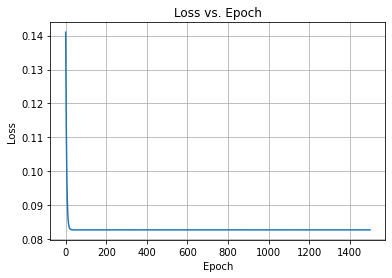

In [26]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

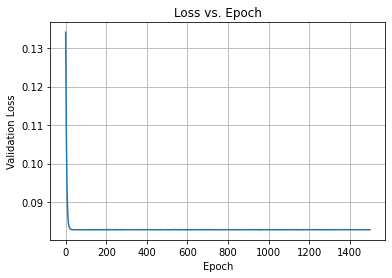

In [27]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 11ms/step


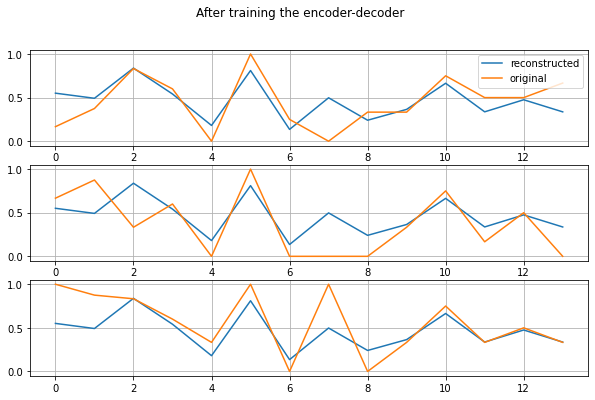

In [28]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

1/1 [==============================] - 0s 12ms/step


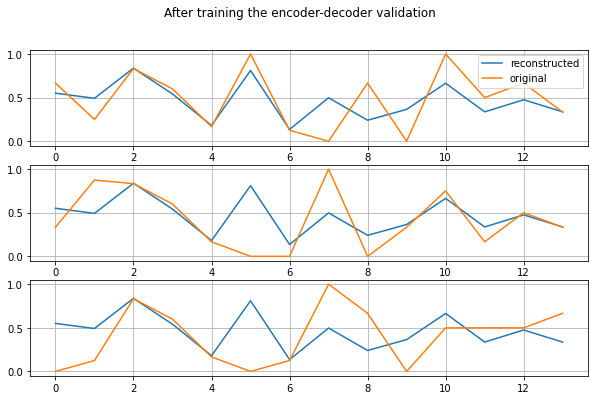

In [29]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [30]:
encoder = Model(inputs = input_dim, outputs = encoded6)
encoded_input = Input(shape = (encoding_dim, ))

In [31]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

71/71 [==============================] - 0s 478us/step


In [32]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='abandona')

## Sigmoid con 14,10,8,4,2

In [33]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(10, activation = activation)(input_dim)
encoded2 = Dense(8, activation = activation)(encoded1)
encoded3 = Dense(4, activation = activation)(encoded2)
encoded4 = Dense(encoding_dim, activation = activation)(encoded3)
decoded1 = Dense(4, activation = activation)(encoded4)
decoded2 = Dense(8, activation = activation)(decoded1)
decoded3 = Dense(10, activation = activation)(decoded2)
decoded4 = Dense(ncol, activation = activation)(decoded3)

autoencoder = Model(inputs = input_dim, outputs = decoded4)
autoencoder.compile(loss='mse', optimizer='adam')


In [34]:
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_12 (Dense)            (None, 10)                150       
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 dense_17 (Dense)            (None, 8)                 40  

In [35]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=20000, 
                                batch_size=batch_size, verbose=0)

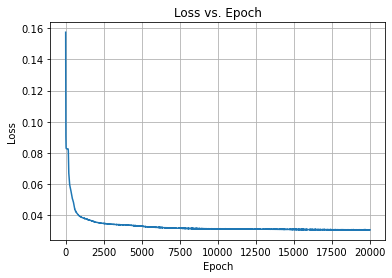

In [36]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

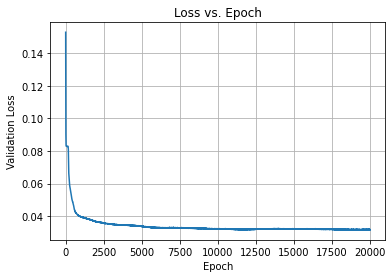

In [37]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 14ms/step


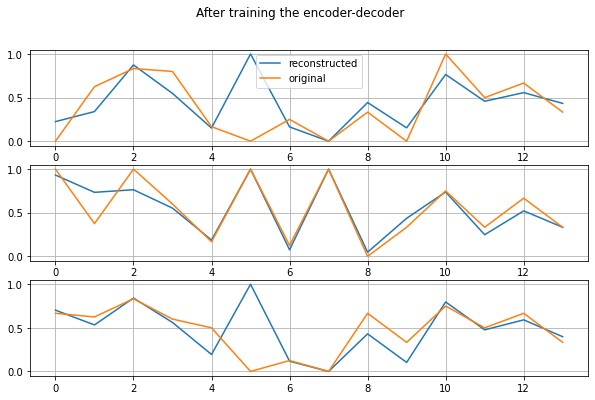

In [38]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

1/1 [==============================] - 0s 16ms/step


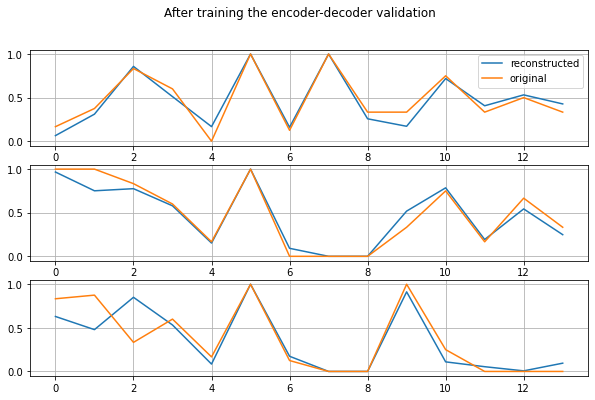

In [39]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [40]:
encoder = Model(inputs = input_dim, outputs = encoded4)
encoded_input = Input(shape = (encoding_dim, ))

In [41]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

71/71 [==============================] - 0s 609us/step


In [42]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='abandona')

In [43]:
analys_personal_data_encoded.drop(['abandona'],axis=1,inplace=True)

In [44]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_encoded)
analys_personal_data_encoded['labels'] = kmeans.predict(analys_personal_data_encoded)
# analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [45]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='labels')

In [46]:
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [47]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [48]:
get_impurity(analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'], analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'])

0.4284456186701894

In [49]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'].value_counts()

0    540
1    403
Name: abandona, dtype: int64

In [50]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'].value_counts()

1    758
0    570
Name: abandona, dtype: int64

## Sigmoid con 14,8,2

In [51]:
from keras import optimizers


In [52]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(8, activation = activation)(input_dim)
encoded2 = Dense(encoding_dim, activation = activation)(encoded1)
decoded1 = Dense(8, activation = activation)(encoded2)
decoded2 = Dense(ncol, activation = activation)(decoded1)

autoencoder = Model(inputs = input_dim, outputs = decoded2)
autoencoder.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=1e-3))


In [53]:
autoencoder.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_20 (Dense)            (None, 8)                 120       
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
 dense_22 (Dense)            (None, 8)                 24        
                                                                 
 dense_23 (Dense)            (None, 14)                126       
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=3000, 
                                batch_size=batch_size, verbose=0)

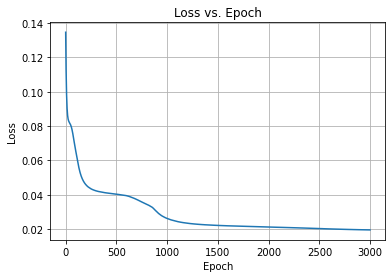

In [55]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

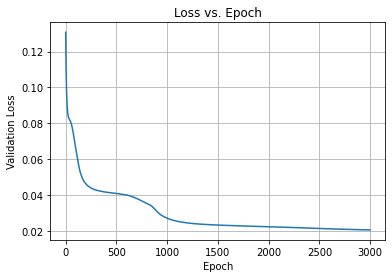

In [56]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 15ms/step


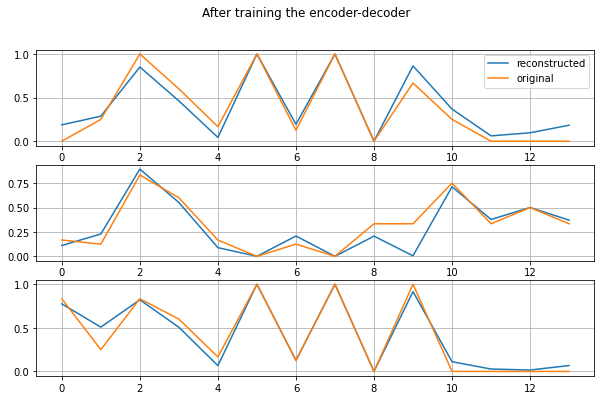

In [57]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

1/1 [==============================] - 0s 15ms/step


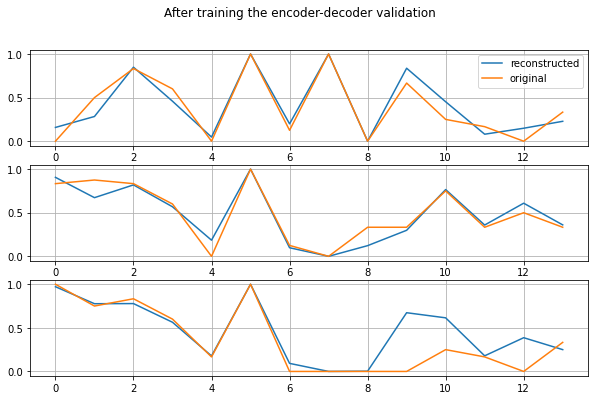

In [58]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [59]:
encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))

In [60]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

71/71 [==============================] - 0s 444us/step


In [61]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='abandona')

In [62]:
analys_personal_data_encoded.drop(['abandona'],axis=1,inplace=True)

In [63]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_encoded)
analys_personal_data_encoded['labels'] = kmeans.predict(analys_personal_data_encoded)
# analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [64]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='labels')

In [65]:
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [66]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [67]:
get_impurity(analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'], analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'])

0.45530603258476443

In [68]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'].value_counts()

1    634
0    507
Name: abandona, dtype: int64

In [69]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'].value_counts()

0    603
1    527
Name: abandona, dtype: int64

## Sigmoid con 14,8,3

In [70]:
from keras import optimizers


In [71]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(8, activation = activation)(input_dim)
encoded2 = Dense(3, activation = activation)(encoded1)
decoded1 = Dense(8, activation = activation)(encoded2)
decoded2 = Dense(ncol, activation = activation)(decoded1)

autoencoder = Model(inputs = input_dim, outputs = decoded2)
autoencoder.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=1e-2))


In [72]:
autoencoder.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_24 (Dense)            (None, 8)                 120       
                                                                 
 dense_25 (Dense)            (None, 3)                 27        
                                                                 
 dense_26 (Dense)            (None, 8)                 32        
                                                                 
 dense_27 (Dense)            (None, 14)                126       
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=4000, 
                                batch_size=batch_size, verbose=0)

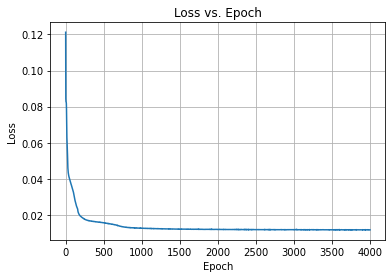

In [74]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

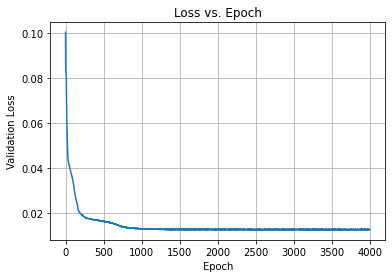

In [75]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 14ms/step


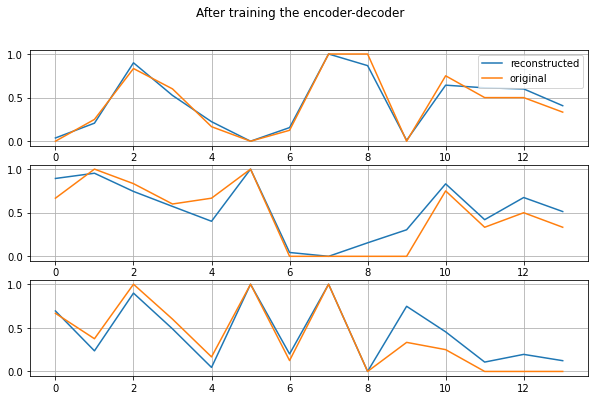

In [76]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

1/1 [==============================] - 0s 16ms/step


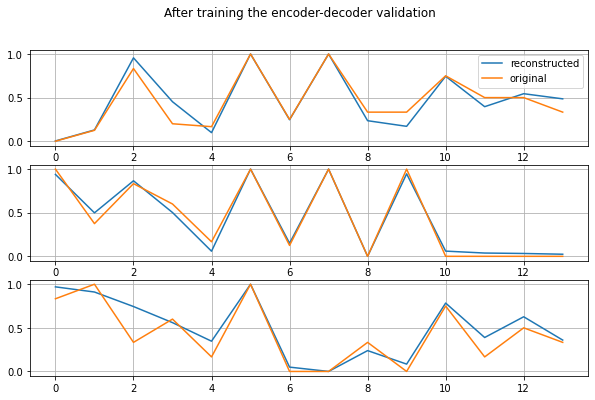

In [77]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [78]:
encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))

In [79]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2', 'independent_feature_3'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

71/71 [==============================] - 0s 930us/step


In [80]:
import plotly.express as px
px.scatter_3d(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", z="independent_feature_3", color='abandona')

In [81]:
analys_personal_data_encoded.drop(['abandona'],axis=1,inplace=True)

In [82]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_encoded)
analys_personal_data_encoded['labels'] = kmeans.predict(analys_personal_data_encoded)
# analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [83]:
import plotly.express as px
px.scatter_3d(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", z="independent_feature_3", color='labels')

In [84]:
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [85]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [86]:
get_impurity(analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'], analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'])

0.4548656979304271

In [87]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'].value_counts()

0    600
1    523
Name: abandona, dtype: int64

In [88]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'].value_counts()

1    638
0    510
Name: abandona, dtype: int64

## Mejores resultados hasta ahora

## Sigmoid con 14,6,3

In [112]:

from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [113]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(6, activation = activation)(input_dim)
encoded2 = Dense(3, activation = activation)(encoded1)
decoded1 = Dense(6, activation = activation)(encoded2)
decoded2 = Dense(ncol, activation = activation)(decoded1)

autoencoder = Model(inputs = input_dim, outputs = decoded2)
autoencoder.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=1e-3))


In [114]:
autoencoder.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 14)]              0         
                                                                 
 dense_20 (Dense)            (None, 6)                 90        
                                                                 
 dense_21 (Dense)            (None, 3)                 21        
                                                                 
 dense_22 (Dense)            (None, 6)                 24        
                                                                 
 dense_23 (Dense)            (None, 14)                98        
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=3000, 
                                batch_size=batch_size, verbose=0)

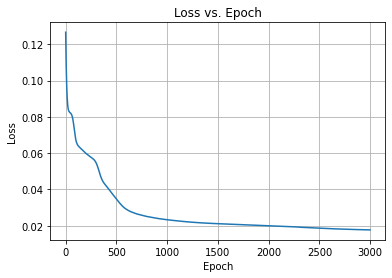

In [116]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

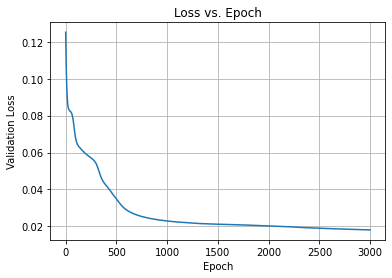

In [117]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 14ms/step


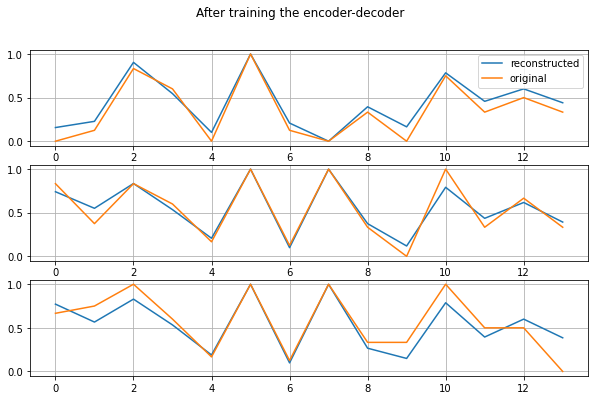

In [118]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

1/1 [==============================] - 0s 14ms/step


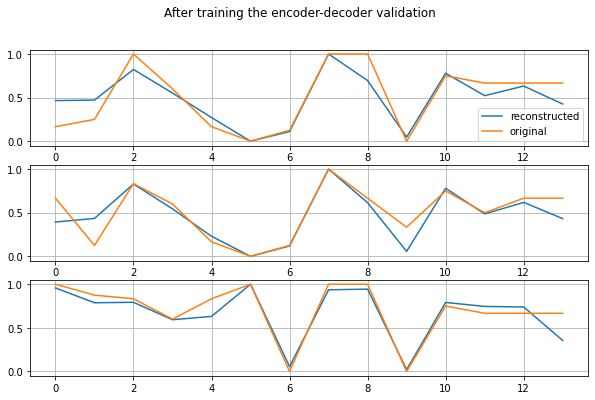

In [119]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [120]:
encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))

In [121]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2', 'independent_feature_3'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

71/71 [==============================] - 0s 508us/step


In [122]:
import plotly.express as px
px.scatter_3d(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", z="independent_feature_3", color='abandona')

In [123]:
analys_personal_data_encoded.drop(['abandona'],axis=1,inplace=True)

In [124]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_encoded)
analys_personal_data_encoded['labels'] = kmeans.predict(analys_personal_data_encoded)
# analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [125]:
import plotly.express as px
px.scatter_3d(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", z="independent_feature_3", color='labels')

In [126]:
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [127]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [128]:
get_impurity(analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'], analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'])

0.4539850286217525

In [129]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'].value_counts()

0    606
1    527
Name: abandona, dtype: int64

In [130]:
analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'].value_counts()

1    634
0    504
Name: abandona, dtype: int64

## Sigmoid con 14,8,4,3

In [108]:
from keras import optimizers


In [109]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(8, activation = activation)(input_dim)
encoded2 = Dense(4, activation = activation)(encoded1)
encoded3 = Dense(3, activation = activation)(encoded2)
decoded1 = Dense(4, activation = activation)(encoded3)
decoded2 = Dense(8, activation = activation)(decoded1)
decoded3 = Dense(ncol, activation = activation)(decoded2)

autoencoder = Model(inputs = input_dim, outputs = decoded3)
autoencoder.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=1e-3))


In [110]:
autoencoder.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 14)]              0         
                                                                 
 dense_32 (Dense)            (None, 8)                 120       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
 dense_34 (Dense)            (None, 3)                 15        
                                                                 
 dense_35 (Dense)            (None, 4)                 16        
                                                                 
 dense_36 (Dense)            (None, 8)                 40        
                                                                 
 dense_37 (Dense)            (None, 14)                126

In [111]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=8000, 
                                batch_size=batch_size, verbose=0)

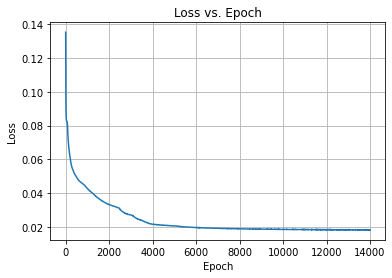

In [112]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

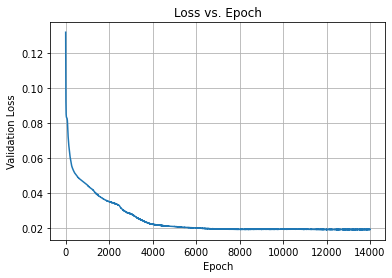

In [113]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 15ms/step


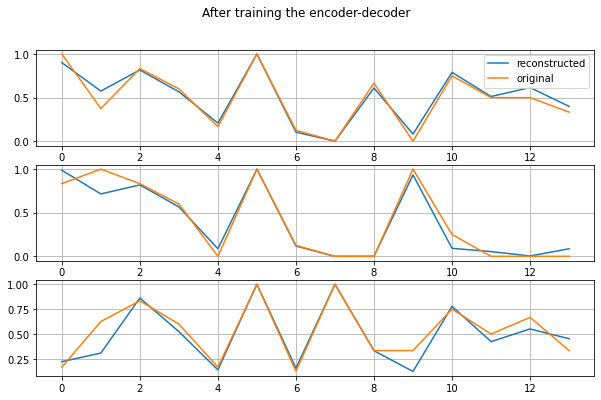

In [114]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

1/1 [==============================] - 0s 16ms/step


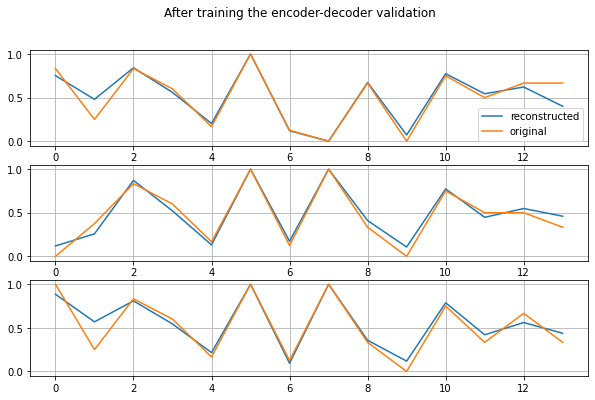

In [115]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [116]:
encoder = Model(inputs = input_dim, outputs = encoded3)
encoded_input = Input(shape = (encoding_dim, ))

In [117]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2','independent_feature_3'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

71/71 [==============================] - 0s 467us/step


In [119]:
import plotly.express as px
px.scatter_3d(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", z="independent_feature_3", color='abandona')

In [120]:
analys_personal_data_encoded.drop(['abandona'],axis=1,inplace=True)

In [121]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_encoded)
analys_personal_data_encoded['labels'] = kmeans.predict(analys_personal_data_encoded)
# analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [123]:
import plotly.express as px
px.scatter_3d(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", z="independent_feature_3", color='labels')

In [124]:
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [125]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [126]:
get_impurity(analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'], analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'])

0.4099515631880229

## Sigmoid con 14,8,4,2

In [ ]:
from keras import optimizers


In [ ]:
input_dim = Input(shape = (ncol, ))

encoded1 = Dense(8, activation = activation)(input_dim)
encoded2 = Dense(4, activation = activation)(encoded1)
encoded3 = Dense(encoding_dim, activation = activation)(encoded2)
decoded1 = Dense(4, activation = activation)(encoded3)
decoded2 = Dense(8, activation = activation)(decoded1)
decoded3 = Dense(ncol, activation = activation)(decoded2)

autoencoder = Model(inputs = input_dim, outputs = decoded3)
autoencoder.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=1e-3))


In [ ]:
autoencoder.summary()


In [ ]:
model_history = autoencoder.fit(X_train,X_train, validation_data=(X_test, X_test), epochs=14000, 
                                batch_size=batch_size, verbose=0)

In [ ]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [ ]:
plt.plot(model_history.history["val_loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [ ]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_train.to_numpy(), 
                   title='After training the encoder-decoder')

In [ ]:
plot_orig_vs_recon(autoencoder=autoencoder, x_train=X_test.to_numpy(), 
                   title='After training the encoder-decoder validation')

In [ ]:
encoder = Model(inputs = input_dim, outputs = encoded3)
encoded_input = Input(shape = (encoding_dim, ))

In [ ]:
analys_personal_data_encoded = pd.DataFrame(encoder.predict(analys_personal_data_labels),columns=['independent_feature_1', 'independent_feature_2'])
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [ ]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='abandona')

In [ ]:
analys_personal_data_encoded.drop(['abandona'],axis=1,inplace=True)

In [ ]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(analys_personal_data_encoded)
analys_personal_data_encoded['labels'] = kmeans.predict(analys_personal_data_encoded)
# analys_personal_data['labels'] = analys_personal_data_clust['labels'].astype('category')

In [ ]:
import plotly.express as px
px.scatter(analys_personal_data_encoded, x="independent_feature_1", y="independent_feature_2", color='labels')

In [ ]:
analys_personal_data_encoded['abandona'] = analys_personal_data['abandona']

In [ ]:
import pandas as pd
def get_impurity(dropout_cl0: pd.core.series.Series, dropout_cl1:pd.core.series.Series):
    impurity = -1
    n = len (dropout_cl0) + len (dropout_cl1)
    if len(dropout_cl0[dropout_cl0 == 0]) > len(dropout_cl0[dropout_cl0 == 1]):
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 0]))/n
    else:
        impurity = (len(dropout_cl0) - len(dropout_cl0[dropout_cl0 == 1]))/n
    if len(dropout_cl1[dropout_cl1 == 0]) > len(dropout_cl1[dropout_cl1 == 1]):
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 0]))/n)
    else:
        impurity = impurity + ((len(dropout_cl1) - len(dropout_cl1[dropout_cl1 == 1]))/n)
        
    return impurity

In [ ]:
get_impurity(analys_personal_data_encoded[analys_personal_data_encoded['labels']==0]['abandona'], analys_personal_data_encoded[analys_personal_data_encoded['labels']==1]['abandona'])